# Mnist Classifier 

In [1]:
%matplotlib inline
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd


# Fetching the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist['data'] 
y = mnist['target']

In [2]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [4]:
full_data = [X, y]
type(X)
type(y)

pandas.core.series.Series

In [5]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Spliting data 
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)  

In [7]:
x_train.shape

(56000, 784)

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()


In [9]:
sgd_model.fit(x_train,y_train)

SGDClassifier()

In [10]:
x_test.loc[46730]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 46730, Length: 784, dtype: int64

In [11]:
sgd_model.predict([x_test.iloc[0]])

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['8'], dtype='<U1')

In [12]:
## Validation
y_test.iloc[0]

'8'

In [13]:
from sklearn.model_selection import cross_val_score, cross_val_predict


cross_val_score(sgd_model, x_test, y_test, cv=3, scoring = 'accuracy')

array([0.87165202, 0.83908292, 0.87248178])

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

predict = cross_val_predict(sgd_model, x_test, y_test, cv=3)
predict

array(['8', '4', '8', ..., '2', '7', '1'], dtype='<U1')

In [15]:
predict.shape

(14000,)

In [16]:
recall_score(y_test, predict, average='weighted') 

np.float64(0.8713571428571428)

In [17]:
precision_score(y_test, predict, average='weighted') 

np.float64(0.873619587853503)

In [18]:
f1_score(y_test, predict, average='weighted') 

np.float64(0.8716113331612526)

In [19]:
from sklearn.neighbors import KNeighborsClassifier


In [20]:
neigbour = KNeighborsClassifier(n_neighbors = 5).fit(x_train,y_train)


In [21]:
neigbour.predict(x_test)

array(['8', '4', '8', ..., '2', '7', '1'], dtype=object)

In [22]:
cross_val_score(neigbour, x_train, y_train, cv=3, scoring = 'accuracy')

array([0.9666256 , 0.9689827 , 0.96657023])

In [23]:
predict_n = cross_val_predict(neigbour, x_train, y_train, cv=3)

In [24]:
precision_scoring = precision_score(y_train, predict_n,  average='weighted')
precision_scoring 

np.float64(0.9676641326725988)

In [25]:
recall_scoring = recall_score(y_train, predict_n,  average='weighted')
recall_scoring

np.float64(0.9673928571428572)

In [26]:
from sklearn.metrics import confusion_matrix

conf_matrix =  confusion_matrix(y_train, predict_n)
conf_matrix

array([[5522,    5,    2,    2,    1,    5,   19,    1,    0,    3],
       [   1, 6241,   13,    3,    1,    0,    5,   10,    1,    2],
       [  51,   53, 5362,   22,    4,    2,    6,   93,   12,    5],
       [   6,   17,   31, 5500,    2,   63,    3,   39,   25,   22],
       [   4,   51,    0,    1, 5335,    0,   15,    5,    1,  117],
       [  17,    6,    1,   67,    9, 4834,   56,    8,    9,   33],
       [  28,   15,    1,    0,    4,   18, 5414,    0,    0,    0],
       [   2,   71,   11,    2,   16,    1,    0, 5623,    2,   62],
       [  21,   76,   21,   91,   29,   83,   29,   15, 5051,   52],
       [  16,   14,    9,   39,   55,   19,    6,   77,   11, 5292]])

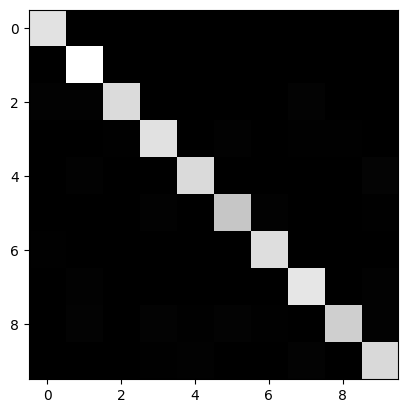

In [27]:
plt.imshow(conf_matrix, cmap = "grey")
plt.show();

## Precision /recall trade-off

In [28]:
# from sklearn.metrics import precision_recall_curve

# y_scoring = neigbour.predict_proba(x_test)
# y_scoring

In [29]:
neigbour.predict(x_test)

array(['8', '4', '8', ..., '2', '7', '1'], dtype=object)

In [30]:
neigbour.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [31]:
# param_grid = {
#     'n_neighbors':[1,3,5],
#     'leaf_size':[10,30,50],
#     'p':[1,2],
#     'weights':['uniform','distance'],
# }
# param_grid

In [32]:
# from sklearn.model_selection import GridSearchCV

# grid_s =  GridSearchCV(
#     neigbour,
#     param_grid,
#     scoring = 'accuracy',
#     cv = 5,
#     verbose = 1,
# )

# grid_s.fit(x_train, y_train)


In [33]:
import joblib
model_dump = joblib.dump(neigbour,"model.pkl")
model_dump

['model.pkl']